In [9]:
###Dental Metric Classification using ML###

#This project explores sex classification based on dental measurements using a dataset of dental metrics grouped by region and sex. 
#It involves preprocessing, feature scaling, imputation, and model comparison across several machine learning classifiers.

#Code Authors: Tanvi Nandani, Alon Gabriel, Eleanor Lehman, Meredith Culhane

'Python ≥ 3.8  \nRequired libraries:\n```bash\npandas\nnumpy\nscikit-learn\nmatplotlib'

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('dental metric data.csv')

In [3]:
df

,pop,sex,mesiodistal_UI1,mesiodistal_UI2,mesiodistal_UC,mesiodistal_UP1,mesiodistal_UP2,mesiodistal_UM1,mesiodistal_UM2,mesiodistal_LI1,...,buccolingual_UP2,buccolingual_UM1,buccolingual_UM2,buccolingual_LI1,buccolingual_LI2,buccolingual_LC,buccolingual_LP1,buccolingual_LP2,buccolingual_LM1,buccolingual_LM2
0,ALEU,female,10.28,9.22,8.50,8.01,7.48,11.83,10.48,NaN,...,9.46,12.17,11.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALEU,male,9.04,7.52,8.16,7.68,7.10,11.21,10.30,NaN,...,9.22,11.88,11.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALEU,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,6.12,6.55,8.14,7.33,8.04,10.64,10.38
3,ALEU,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.42,...,NaN,NaN,NaN,6.05,6.80,8.73,8.52,8.93,11.74,11.65
4,ALEU,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.58,...,NaN,NaN,NaN,6.17,6.99,8.13,7.76,8.09,11.08,10.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,VIET,male,NaN,NaN,7.67,6.68,6.15,10.44,9.36,NaN,...,9.08,11.20,11.14,NaN,NaN,NaN,7.78,NaN,10.85,10.45
905,VIET,male,NaN,NaN,8.02,6.97,6.17,10.11,8.80,5.95,...,9.04,11.29,11.25,6.26,NaN,8.07,7.46,7.75,10.77,10.05
906,VIET,male,NaN,6.41,7.15,6.53,6.22,10.42,9.56,4.81,...,9.10,11.89,11.21,5.77,6.52,8.21,7.77,NaN,10.38,9.20
907,VIET,male,8.31,NaN,7.27,6.73,6.35,9.81,9.80,5.00,...,8.66,10.79,11.54,5.22,6.01,7.26,7.53,7.59,9.60,9.67


In [72]:
unique_populations = df['pop'].unique()
unique_populations


array(['ALEU', 'ARIZ', 'AUST', 'BORN', 'ENGL', 'ESIB', 'GREE', 'ITAL',
       'JAPA', 'KENY', 'MALA', 'MONG', 'NBRI', 'NEPA', 'NETH', 'NFEN',
       'NGUI', 'NIGE', 'PERU', 'PHIL', 'SAFR', 'SFIN', 'SOMA', 'THAI',
       'VANU', 'VIET'], dtype=object)

In [4]:
df. head()

,pop,sex,mesiodistal_UI1,mesiodistal_UI2,mesiodistal_UC,mesiodistal_UP1,mesiodistal_UP2,mesiodistal_UM1,mesiodistal_UM2,mesiodistal_LI1,...,buccolingual_UP2,buccolingual_UM1,buccolingual_UM2,buccolingual_LI1,buccolingual_LI2,buccolingual_LC,buccolingual_LP1,buccolingual_LP2,buccolingual_LM1,buccolingual_LM2
0,ALEU,female,10.28,9.22,8.50,8.01,7.48,11.83,10.48,NaN,...,9.46,12.17,11.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALEU,male,9.04,7.52,8.16,7.68,7.10,11.21,10.30,NaN,...,9.22,11.88,11.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALEU,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,6.12,6.55,8.14,7.33,8.04,10.64,10.38
3,ALEU,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.42,...,NaN,NaN,NaN,6.05,6.80,8.73,8.52,8.93,11.74,11.65
4,ALEU,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.58,...,NaN,NaN,NaN,6.17,6.99,8.13,7.76,8.09,11.08,10.66


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pop               909 non-null    object 
 1   sex               909 non-null    object 
 2   mesiodistal_UI1   454 non-null    float64
 3   mesiodistal_UI2   492 non-null    float64
 4   mesiodistal_UC    676 non-null    float64
 5   mesiodistal_UP1   754 non-null    float64
 6   mesiodistal_UP2   767 non-null    float64
 7   mesiodistal_UM1   807 non-null    float64
 8   mesiodistal_UM2   811 non-null    float64
 9   mesiodistal_LI1   466 non-null    float64
 10  mesiodistal_LI2   570 non-null    float64
 11  mesiodistal_LC    671 non-null    float64
 12  mesiodistal_LP1   752 non-null    float64
 13  mesiodistal_LP2   748 non-null    float64
 14  mesiodistal_LM1   780 non-null    float64
 15  mesiodistal_LM2   792 non-null    float64
 16  buccolingual_UI1  504 non-null    float64
 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pop               909 non-null    object 
 1   sex               909 non-null    object 
 2   mesiodistal_UI1   454 non-null    float64
 3   mesiodistal_UI2   492 non-null    float64
 4   mesiodistal_UC    676 non-null    float64
 5   mesiodistal_UP1   754 non-null    float64
 6   mesiodistal_UP2   767 non-null    float64
 7   mesiodistal_UM1   807 non-null    float64
 8   mesiodistal_UM2   811 non-null    float64
 9   mesiodistal_LI1   466 non-null    float64
 10  mesiodistal_LI2   570 non-null    float64
 11  mesiodistal_LC    671 non-null    float64
 12  mesiodistal_LP1   752 non-null    float64
 13  mesiodistal_LP2   748 non-null    float64
 14  mesiodistal_LM1   780 non-null    float64
 15  mesiodistal_LM2   792 non-null    float64
 16  buccolingual_UI1  504 non-null    float64
 1

In [7]:
df.describe()

,mesiodistal_UI1,mesiodistal_UI2,mesiodistal_UC,mesiodistal_UP1,mesiodistal_UP2,mesiodistal_UM1,mesiodistal_UM2,mesiodistal_LI1,mesiodistal_LI2,mesiodistal_LC,...,buccolingual_UP2,buccolingual_UM1,buccolingual_UM2,buccolingual_LI1,buccolingual_LI2,buccolingual_LC,buccolingual_LP1,buccolingual_LP2,buccolingual_LM1,buccolingual_LM2
count,454.000000,492.000000,676.000000,754.000000,767.000000,807.000000,811.000000,466.000000,570.000000,671.000000,...,761.000000,813.000000,810.000000,521.000000,599.000000,692.000000,747.000000,743.000000,779.000000,791.000000
mean,8.578789,7.010122,7.883343,7.212891,6.857027,10.760186,10.073785,5.367210,6.004263,6.957377,...,9.398962,11.657811,11.670568,5.828752,6.243907,7.731893,8.015435,8.432530,10.792747,10.374539
std,0.588933,0.709201,0.571755,0.570566,0.529028,0.655563,0.749598,0.362526,0.435421,0.543952,...,0.687773,0.670482,0.766617,0.402151,0.432386,0.597203,0.641909,0.625221,0.615747,0.659667
min,7.140000,5.240000,5.760000,5.560000,5.000000,8.820000,7.120000,4.440000,4.470000,5.590000,...,6.990000,9.540000,9.620000,4.820000,5.040000,6.020000,6.050000,6.670000,9.120000,8.310000
25%,8.180000,6.537500,7.480000,6.800000,6.490000,10.340000,9.535000,5.102500,5.690000,6.570000,...,8.910000,11.210000,11.132500,5.530000,5.960000,7.290000,7.590000,7.980000,10.380000,9.920000
50%,8.510000,6.980000,7.860000,7.240000,6.850000,10.740000,10.070000,5.370000,5.990000,6.940000,...,9.390000,11.630000,11.650000,5.810000,6.210000,7.730000,7.990000,8.430000,10.770000,10.390000
75%,8.950000,7.432500,8.250000,7.600000,7.205000,11.180000,10.585000,5.610000,6.300000,7.305000,...,9.820000,12.100000,12.207500,6.120000,6.550000,8.130000,8.410000,8.840000,11.210000,10.800000
max,10.850000,9.220000,9.600000,8.850000,8.540000,13.200000,12.490000,6.840000,7.320000,8.860000,...,11.420000,13.500000,14.310000,7.290000,7.900000,9.530000,9.870000,10.740000,13.110000,12.380000


In [8]:
df.isna().mean()

pop                 0.000000
sex                 0.000000
mesiodistal_UI1     0.500550
mesiodistal_UI2     0.458746
mesiodistal_UC      0.256326
mesiodistal_UP1     0.170517
mesiodistal_UP2     0.156216
mesiodistal_UM1     0.112211
mesiodistal_UM2     0.107811
mesiodistal_LI1     0.487349
mesiodistal_LI2     0.372937
mesiodistal_LC      0.261826
mesiodistal_LP1     0.172717
mesiodistal_LP2     0.177118
mesiodistal_LM1     0.141914
mesiodistal_LM2     0.128713
buccolingual_UI1    0.445545
buccolingual_UI2    0.405941
buccolingual_UC     0.246425
buccolingual_UP1    0.172717
buccolingual_UP2    0.162816
buccolingual_UM1    0.105611
buccolingual_UM2    0.108911
buccolingual_LI1    0.426843
buccolingual_LI2    0.341034
buccolingual_LC     0.238724
buccolingual_LP1    0.178218
buccolingual_LP2    0.182618
buccolingual_LM1    0.143014
buccolingual_LM2    0.129813
dtype: float64

In [9]:
# drop columns that have missing values and not required for model

columns_to_drop = df.filter(regex = 'I1|I2').columns

df.drop(columns = columns_to_drop, inplace = True)

df.isna().mean()

pop                 0.000000
sex                 0.000000
mesiodistal_UC      0.256326
mesiodistal_UP1     0.170517
mesiodistal_UP2     0.156216
mesiodistal_UM1     0.112211
mesiodistal_UM2     0.107811
mesiodistal_LC      0.261826
mesiodistal_LP1     0.172717
mesiodistal_LP2     0.177118
mesiodistal_LM1     0.141914
mesiodistal_LM2     0.128713
buccolingual_UC     0.246425
buccolingual_UP1    0.172717
buccolingual_UP2    0.162816
buccolingual_UM1    0.105611
buccolingual_UM2    0.108911
buccolingual_LC     0.238724
buccolingual_LP1    0.178218
buccolingual_LP2    0.182618
buccolingual_LM1    0.143014
buccolingual_LM2    0.129813
dtype: float64

In [10]:
#drop rows that have any dimension missing 

df_cleaned = df.dropna(thresh = 20)
df_cleaned.isna().mean()


pop                 0.000000
sex                 0.000000
mesiodistal_UC      0.080082
mesiodistal_UP1     0.016427
mesiodistal_UP2     0.012320
mesiodistal_UM1     0.014374
mesiodistal_UM2     0.016427
mesiodistal_LC      0.090349
mesiodistal_LP1     0.030801
mesiodistal_LP2     0.039014
mesiodistal_LM1     0.018480
mesiodistal_LM2     0.020534
buccolingual_UC     0.078029
buccolingual_UP1    0.018480
buccolingual_UP2    0.016427
buccolingual_UM1    0.012320
buccolingual_UM2    0.020534
buccolingual_LC     0.075975
buccolingual_LP1    0.028747
buccolingual_LP2    0.041068
buccolingual_LM1    0.020534
buccolingual_LM2    0.020534
dtype: float64

In [15]:
# impute the missing values with mean values per region and by sex 

#group data by region, and then by sex in each region, and then find the average of each dimension per sex per region
grouped_means = df_cleaned.groupby(['pop', 'sex']).mean()
grouped_means

grouped_means

mesiodistal_UC  mesiodistal_UP1  mesiodistal_UP2  \
pop  sex                                                        
ALEU female        8.013750         7.308750         6.830000   
     male          8.483333         7.636000         7.131333   
ARIZ female        8.640000         7.746667         7.515000   
     male          8.852222         7.953333         7.463333   
AUST female        8.290000         7.490000         7.620000   
     male          8.100000         7.240000         6.810000   
BORN female        7.420000         6.905000         6.673333   
     male          7.826000         7.409444         6.888824   
ENGL female        7.256364         6.451818         6.376667   
     male          7.474595         6.622297         6.476027   
ESIB male          8.210000         6.910000         6.490000   
GREE female        7.210000         6.010000         6.080000   
     male          7.558000         6.692500         6.322222   
ITAL male          7.382500         6.623333         6.621111   
JAPA female        7.320000         6.676667         6.293333   
     male          8.076522         7.510870         7.034565   
KENY female        8.160000         7.406667         7.316667   
     male          7.940000         7.633846         7.264615   
MALA female        7.510000         6.800000         6.560000   
     male          8.247778         7.425556         7.038889   
MONG female        7.611818         6.890000         6.519091   
     male          7.943000         7.232727         6.786364   
NBRI female        8.143000         7.509091         7.006364   
     male          8.462667         7.727500         7.328387   
NEPA male          7.718000         7.100000         6.464000   
NETH male          7.140000         6.545000         6.402500   
NFEN female        7.410000         6.870000         7.110000   
     male          7.700000         6.976667         6.643333   
NGUI female        8.042500         7.653333         7.120000   
     male          7.946667         7.244286         7.028571   
NIGE female        7.927273         7.404545         7.001818   
     male          8.115667         7.550000         6.985161   
PERU female        8.248571         7.338750         7.258750   
     male          8.390000         7.640667         7.241333   
PHIL female        7.411429         7.084286         6.634286   
     male          8.090909         7.437692         6.973846   
SAFR female        7.550000         7.320000         7.010000   
     male          7.456667         7.445000         7.270000   
SFIN male          7.720000         6.853333         6.463333   
SOMA male          7.591429         7.255625         6.880625   
THAI male          7.964286         7.476250         7.058750   
VANU female        7.870000         7.018333         6.573333   
     male          8.538889         7.554000         7.155000   
VIET male          7.650000         6.932500         6.400000   

             mesiodistal_UM1  mesiodistal_UM2  mesiodistal_LC  \
pop  sex                                                        
ALEU female        10.480000        10.053750        6.991429   
     male          11.036000        10.378000        7.635333   
ARIZ female        11.083333        10.556667        7.453333   
     male          11.237778        10.835556        7.878571   
AUST female        10.700000        10.340000        7.220000   
     male                NaN        10.350000        7.480000   
BORN female        10.066667         9.460000        6.310000   
     male          10.595789         9.888421        7.019444   
ENGL female         9.913333         9.204000        6.269091   
     male          10.506849         9.632192        6.621389   
ESIB male          11.080000        10.900000        7.250000   
GREE female         9.000000         9.230000        6.260000   
     male          10.063333         9.571111        6.536250   
ITAL male          10.492353         9.815556  

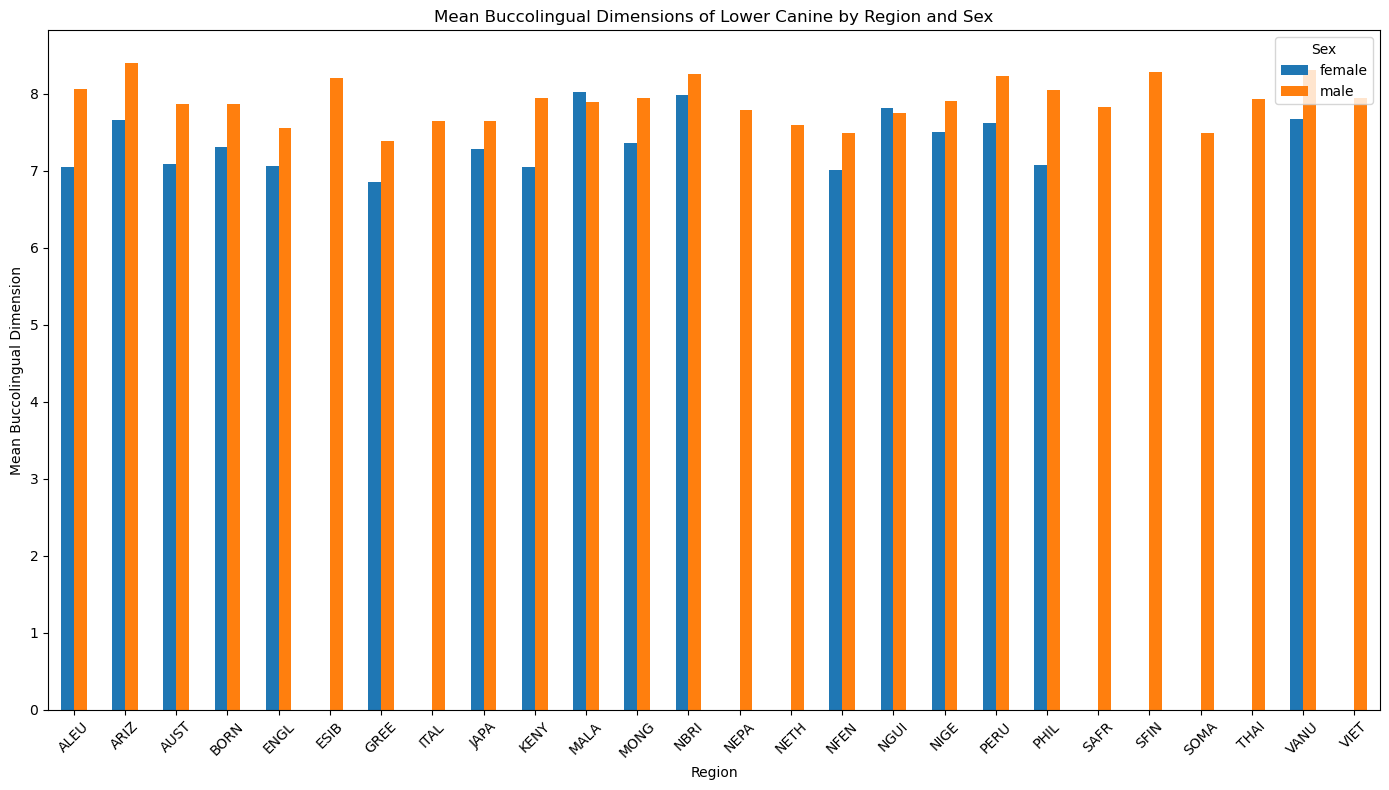

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Select the necessary columns for buccolingual dimensions of the lower canine
columns_of_interest = ['pop', 'sex', 'buccolingual_LC']
filtered_data = df_cleaned[columns_of_interest]

# Group the data by region and sex, and calculate the mean
grouped_means = filtered_data.groupby(['pop', 'sex']).mean().unstack()

# Plotting the bar graph
plt.figure(figsize=(14, 8))

# Create a bar graph for each sex
grouped_means['buccolingual_LC'].plot(kind='bar', ax=plt.gca())

plt.title('Mean Buccolingual Dimensions of Lower Canine by Region and Sex')
plt.xlabel('Region')
plt.ylabel('Mean Buccolingual Dimension')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()





In [16]:
# impute the missing values with mean values per region and by sex 

#create a function to fill missing values with the corresponding mean

def fill_na_with_group_mean(row, grouped_means):
    for column in df_cleaned.columns:
        if pd.isnull(row[column]):
            try:
                row[column] = grouped_means.at[(row['pop'], row['sex']), column]
            except KeyError:
                # Handle missing key 
                row[column] = None  
    return row
    
df_imputed = df_cleaned.apply(lambda row: fill_na_with_group_mean(row, grouped_means), axis=1)
df_imputed

,pop,sex,mesiodistal_UC,mesiodistal_UP1,mesiodistal_UP2,mesiodistal_UM1,mesiodistal_UM2,mesiodistal_LC,mesiodistal_LP1,mesiodistal_LP2,...,buccolingual_UC,buccolingual_UP1,buccolingual_UP2,buccolingual_UM1,buccolingual_UM2,buccolingual_LC,buccolingual_LP1,buccolingual_LP2,buccolingual_LM1,buccolingual_LM2
16,ALEU,male,7.74,6.89,6.78,10.44,8.97,7.03,7.198571,6.740000,...,8.11,9.14,9.09,11.690000,10.92,8.16,7.87,7.750000,10.71,9.690000
18,ALEU,male,8.74,7.49,6.97,10.89,10.29,7.46,7.110000,6.930000,...,9.48,10.32,10.29,12.300000,12.32,8.65,8.66,9.110000,10.78,10.792857
24,ALEU,female,7.92,7.52,7.36,10.75,9.97,7.23,6.840000,7.510000,...,7.89,8.93,8.98,11.290000,10.97,6.96,7.37,7.960000,10.71,9.850000
25,ALEU,female,7.88,7.09,6.79,9.97,9.47,6.80,6.730000,7.085714,...,7.90,8.35,8.56,10.850000,10.50,7.25,7.04,8.135714,10.29,10.080000
26,ALEU,female,7.94,7.62,7.19,10.48,10.85,6.96,7.340000,7.740000,...,7.66,8.83,8.95,11.541429,11.31,7.18,7.45,8.210000,10.25,10.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,VANU,male,8.29,7.84,7.39,11.46,9.61,7.20,7.240000,7.170000,...,9.12,10.72,9.91,11.940000,10.76,9.04,8.70,9.330000,10.91,10.580000
905,VIET,male,8.02,6.97,6.17,10.11,8.80,6.92,6.820000,6.940000,...,7.73,8.91,9.04,11.290000,11.25,8.07,7.46,7.750000,10.77,10.050000
906,VIET,male,7.15,6.53,6.22,10.42,9.56,6.67,6.430000,6.980000,...,7.98,9.39,9.10,11.890000,11.21,8.21,7.77,7.823333,10.38,9.200000
907,VIET,male,7.27,6.73,6.35,9.81,9.80,6.63,6.680000,6.500000,...,8.57,8.97,8.66,10.790000,11.54,7.26,7.53,7.590000,9.60,9.670000


In [17]:
df_final = df_imputed.dropna()
df_final.describe()

,mesiodistal_UC,mesiodistal_UP1,mesiodistal_UP2,mesiodistal_UM1,mesiodistal_UM2,mesiodistal_LC,mesiodistal_LP1,mesiodistal_LP2,mesiodistal_LM1,mesiodistal_LM2,buccolingual_UC,buccolingual_UP1,buccolingual_UP2,buccolingual_UM1,buccolingual_UM2,buccolingual_LC,buccolingual_LP1,buccolingual_LP2,buccolingual_LM1,buccolingual_LM2
count,484.00000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.00000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,7.91263,7.231967,6.874178,10.741249,10.088041,6.984249,7.122740,7.242479,11.507246,10.975223,8.41235,9.463424,9.427513,11.652152,11.683229,7.757918,8.020132,8.449081,10.775692,10.378286
std,0.56332,0.584943,0.526748,0.659670,0.741762,0.521456,0.550852,0.553967,0.680777,0.781736,0.63127,0.755574,0.690814,0.668938,0.773638,0.598596,0.632890,0.635580,0.614221,0.658954
min,6.60000,5.560000,5.240000,8.820000,8.030000,5.590000,5.440000,5.810000,9.390000,8.840000,6.68000,7.050000,7.680000,9.540000,9.620000,6.020000,6.050000,6.670000,9.160000,8.310000
25%,7.51000,6.810000,6.507500,10.307500,9.540000,6.630000,6.770000,6.890000,11.050000,10.430000,7.99750,8.985000,8.930000,11.227500,11.127500,7.317500,7.600000,7.990000,10.400000,9.917500
50%,7.89000,7.270000,6.850000,10.715000,10.070000,6.975000,7.100000,7.230000,11.510000,10.930000,8.39000,9.445000,9.400000,11.635000,11.643095,7.750000,8.000000,8.430000,10.745000,10.400000
75%,8.26000,7.610000,7.212500,11.172500,10.610000,7.310000,7.480000,7.665000,11.960000,11.445000,8.78250,9.960000,9.852500,12.050000,12.190000,8.160000,8.402500,8.850000,11.200000,10.782500
max,9.60000,8.850000,8.380000,12.610000,12.490000,8.700000,8.840000,10.010000,13.260000,13.390000,10.60000,11.740000,11.420000,13.420000,14.310000,9.530000,9.750000,10.740000,13.110000,12.380000


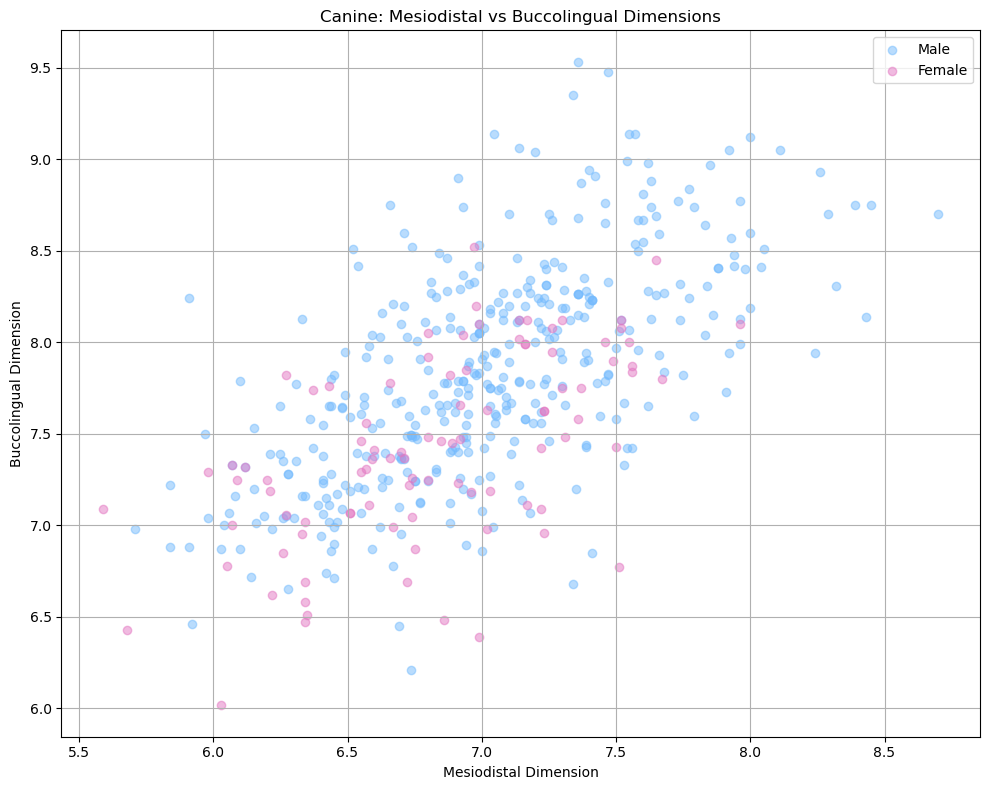

In [23]:
import matplotlib.pyplot as plt

# Select mesiodistal and buccolingual dimensions for upper and lower canines
mesiodistal_UC = df_final['mesiodistal_UC']
buccolingual_UC = df_final['buccolingual_UC']
sex_UC = df_final['sex']

mesiodistal_LC = df_final['mesiodistal_LC']
buccolingual_LC = df_final['buccolingual_LC']
sex_LC = df_final['sex']

# Create figure and axis for the plot
plt.figure(figsize=(10, 8))

# Scatter plot for Male Lower Canine (LC)
plt.scatter(mesiodistal_LC[sex_LC=='male'], buccolingual_LC[sex_LC=='male'], alpha=0.5, color='xkcd:sky blue', label='Male')

# Scatter plot for Female Lower Canine (LC)
plt.scatter(mesiodistal_LC[sex_LC=='female'], buccolingual_LC[sex_LC=='female'], alpha=0.5, color='tab:pink', label='Female')

# Set plot title and labels
plt.title('Canine: Mesiodistal vs Buccolingual Dimensions')
plt.xlabel('Mesiodistal Dimension')
plt.ylabel('Buccolingual Dimension')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

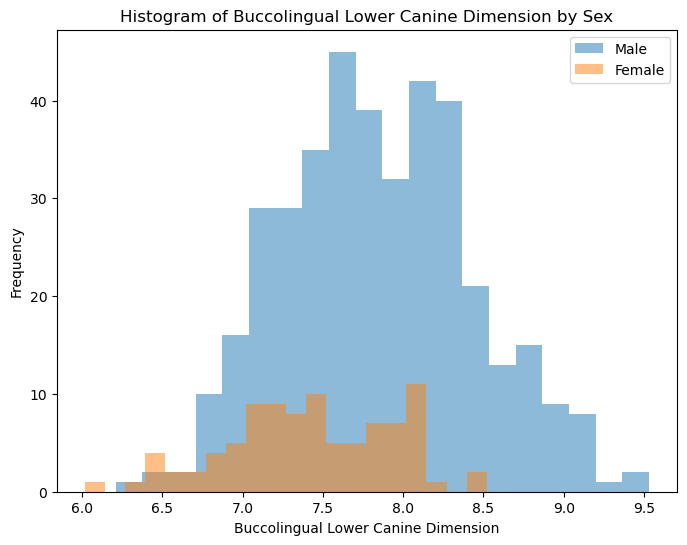

In [24]:
import matplotlib.pyplot as plt

# Example: Histogram of buccolingual_LC dimension for males and females
plt.figure(figsize=(8, 6))

# Filter data by sex
male_data = df_final[df_final['sex'] == 'male']['buccolingual_LC']
female_data = df_final[df_final['sex'] == 'female']['buccolingual_LC']

# Plot histograms
plt.hist(male_data, bins=20, alpha=0.5, label='Male')
plt.hist(female_data, bins=20, alpha=0.5, label='Female')

# Add labels and title
plt.xlabel('Buccolingual Lower Canine Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Buccolingual Lower Canine Dimension by Sex')
plt.legend()

# Show plot
plt.show()

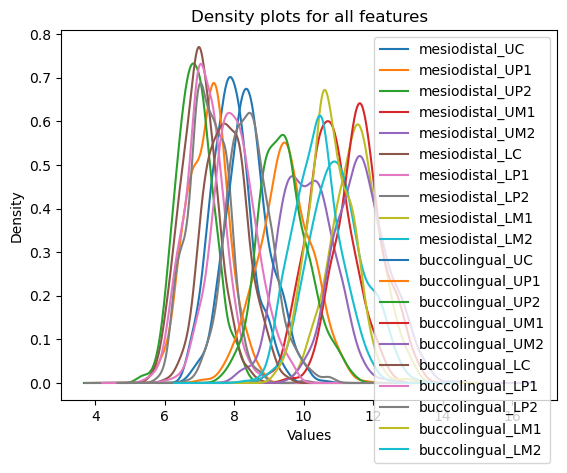

In [25]:
# density plot for all features

df_imputed.plot.kde(legend=True)  # plot for all columns 

# Set the title and labels
plt.title("Density plots for all features")
plt.xlabel("Values")
plt.ylabel("Density")

# Display the plot
plt.show()

In [26]:
# this block of code performs MinMaxScaler on all feature columns

# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# select all columns except the last column, i.e., the labels
columns_to_scale = df_final.columns[2:]

# Perform min-max scaling on selected columns
df_final_scaled = df_final.copy() 
df_final_scaled[columns_to_scale] = scaler.fit_transform(df_final[columns_to_scale])
df_final_scaled

,pop,sex,mesiodistal_UC,mesiodistal_UP1,mesiodistal_UP2,mesiodistal_UM1,mesiodistal_UM2,mesiodistal_LC,mesiodistal_LP1,mesiodistal_LP2,...,buccolingual_UC,buccolingual_UP1,buccolingual_UP2,buccolingual_UM1,buccolingual_UM2,buccolingual_LC,buccolingual_LP1,buccolingual_LP2,buccolingual_LM1,buccolingual_LM2
16,ALEU,male,0.380000,0.404255,0.490446,0.427441,0.210762,0.463023,0.517227,0.221429,...,0.364796,0.445629,0.377005,0.554124,0.277186,0.609687,0.491892,0.265356,0.392405,0.339066
18,ALEU,male,0.713333,0.586626,0.550955,0.546174,0.506726,0.601286,0.491176,0.266667,...,0.714286,0.697228,0.697861,0.711340,0.575693,0.749288,0.705405,0.599509,0.410127,0.610039
24,ALEU,female,0.440000,0.595745,0.675159,0.509235,0.434978,0.527331,0.411765,0.404762,...,0.308673,0.400853,0.347594,0.451031,0.287846,0.267806,0.356757,0.316953,0.392405,0.378378
25,ALEU,female,0.426667,0.465046,0.493631,0.303430,0.322870,0.389068,0.379412,0.303741,...,0.311224,0.277186,0.235294,0.337629,0.187633,0.350427,0.267568,0.360126,0.286076,0.434889
26,ALEU,female,0.446667,0.626140,0.621019,0.437995,0.632287,0.440514,0.558824,0.459524,...,0.250000,0.379531,0.339572,0.515832,0.360341,0.330484,0.378378,0.378378,0.275949,0.422604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,VANU,male,0.563333,0.693009,0.684713,0.696570,0.354260,0.517685,0.529412,0.323810,...,0.622449,0.782516,0.596257,0.618557,0.243070,0.860399,0.716216,0.653563,0.443038,0.557740
905,VIET,male,0.473333,0.428571,0.296178,0.340369,0.172646,0.427653,0.405882,0.269048,...,0.267857,0.396588,0.363636,0.451031,0.347548,0.584046,0.381081,0.265356,0.407595,0.427518
906,VIET,male,0.183333,0.294833,0.312102,0.422164,0.343049,0.347267,0.291176,0.278571,...,0.331633,0.498934,0.379679,0.605670,0.339019,0.623932,0.464865,0.283374,0.308861,0.218673
907,VIET,male,0.223333,0.355623,0.353503,0.261214,0.396861,0.334405,0.364706,0.164286,...,0.482143,0.409382,0.262032,0.322165,0.409382,0.353276,0.400000,0.226044,0.111392,0.334152


In [27]:
#feature selection

# the code below performs univariate feature selection
# by removing all but the top k best scoring features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

# prepare the data for training a classifier

columns_to_use = df_final.columns[2:]
X = df_final_scaled[columns_to_use]  # features for training, note X is capitalized
y = df_final_scaled["sex"]  # responses for training


In [28]:
#feature selection

# the code below performs univariate feature selection
# by removing all but the top k best scoring features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

# prepare the data for training a classifier

columns_to_use = df_final.columns[2:]
X_pop = df_final_scaled[columns_to_use]  # features for training, note X is capitalized
y_pop = df_final_scaled["pop"]  # responses for training

In [29]:
X.shape

(484, 20)

In [30]:
X

,mesiodistal_UC,mesiodistal_UP1,mesiodistal_UP2,mesiodistal_UM1,mesiodistal_UM2,mesiodistal_LC,mesiodistal_LP1,mesiodistal_LP2,mesiodistal_LM1,mesiodistal_LM2,buccolingual_UC,buccolingual_UP1,buccolingual_UP2,buccolingual_UM1,buccolingual_UM2,buccolingual_LC,buccolingual_LP1,buccolingual_LP2,buccolingual_LM1,buccolingual_LM2
16,0.380000,0.404255,0.490446,0.427441,0.210762,0.463023,0.517227,0.221429,0.403101,0.283516,0.364796,0.445629,0.377005,0.554124,0.277186,0.609687,0.491892,0.265356,0.392405,0.339066
18,0.713333,0.586626,0.550955,0.546174,0.506726,0.601286,0.491176,0.266667,0.439276,0.536264,0.714286,0.697228,0.697861,0.711340,0.575693,0.749288,0.705405,0.599509,0.410127,0.610039
24,0.440000,0.595745,0.675159,0.509235,0.434978,0.527331,0.411765,0.404762,0.739018,0.591209,0.308673,0.400853,0.347594,0.451031,0.287846,0.267806,0.356757,0.316953,0.392405,0.378378
25,0.426667,0.465046,0.493631,0.303430,0.322870,0.389068,0.379412,0.303741,0.408269,0.323077,0.311224,0.277186,0.235294,0.337629,0.187633,0.350427,0.267568,0.360126,0.286076,0.434889
26,0.446667,0.626140,0.621019,0.437995,0.632287,0.440514,0.558824,0.459524,0.534884,0.560440,0.250000,0.379531,0.339572,0.515832,0.360341,0.330484,0.378378,0.378378,0.275949,0.422604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.563333,0.693009,0.684713,0.696570,0.354260,0.517685,0.529412,0.323810,0.630491,0.580220,0.622449,0.782516,0.596257,0.618557,0.243070,0.860399,0.716216,0.653563,0.443038,0.557740
905,0.473333,0.428571,0.296178,0.340369,0.172646,0.427653,0.405882,0.269048,0.524548,0.336264,0.267857,0.396588,0.363636,0.451031,0.347548,0.584046,0.381081,0.265356,0.407595,0.427518
906,0.183333,0.294833,0.312102,0.422164,0.343049,0.347267,0.291176,0.278571,0.483204,0.303297,0.331633,0.498934,0.379679,0.605670,0.339019,0.623932,0.464865,0.283374,0.308861,0.218673
907,0.223333,0.355623,0.353503,0.261214,0.396861,0.334405,0.364706,0.164286,0.328165,0.393407,0.482143,0.409382,0.262032,0.322165,0.409382,0.353276,0.400000,0.226044,0.111392,0.334152


In [31]:
y.shape


(484,)

In [32]:
# use F-value or F-statistic to score individual features 
# only select the best k features

# F-value is calculated using a ANOVA test
# and measures the ratio of the between-group variability to 
# the within-group variability

X_new = SelectKBest(f_classif, k=7).fit_transform(X, y)

In [33]:
X_new.shape

(484, 7)

In [34]:
X_new

#select best features, but it got rid of all buccolingual dimensions

array([[0.28351648, 0.36479592, 0.37700535, ..., 0.2771855 , 0.60968661,
        0.33906634],
       [0.53626374, 0.71428571, 0.69786096, ..., 0.57569296, 0.74928775,
        0.61003861],
       [0.59120879, 0.30867347, 0.34759358, ..., 0.28784648, 0.26780627,
        0.37837838],
       ...,
       [0.3032967 , 0.33163265, 0.37967914, ..., 0.33901919, 0.62393162,
        0.21867322],
       [0.39340659, 0.48214286, 0.26203209, ..., 0.40938166, 0.35327635,
        0.33415233],
       [0.48791209, 0.41071429, 0.29946524, ..., 0.46695096, 0.63532764,
        0.52088452]])

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 5, test_size = 0.3)

In [36]:
X_train.shape

(338, 20)

In [37]:
X_test.shape

(146, 20)

In [38]:
# now let's create a kNN model to fit this data
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier

# to create an estimator, we simply create an object knn in order to call all its methods

knn = KNeighborsClassifier(algorithm="auto", leaf_size=30, metric="minkowski",\
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2, weights="uniform") 

In [39]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
predicted = knn.predict(X=X_test)
expected = y_test


In [41]:
predicted[:20]

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'male', 'male', 'male'], dtype=object)

In [42]:
expected[:20]

355      male
794      male
693      male
210      male
610      male
91       male
418      male
834      male
281      male
478    female
899    female
780      male
533    female
662      male
539      male
61       male
421      male
515      male
403      male
433      male
Name: sex, dtype: object

In [43]:
# now lets locate all the incorrect predictions

wrong = [(p,e) for (p,e) in zip(predicted, expected) if p!=e]

wrong


[('male', 'female'),
 ('male', 'female'),
 ('male', 'female'),
 ('female', 'male'),
 ('male', 'female'),
 ('female', 'male'),
 ('male', 'female'),
 ('female', 'male'),
 ('male', 'female'),
 ('male', 'female'),
 ('female', 'male'),
 ('male', 'female'),
 ('male', 'female'),
 ('female', 'male'),
 ('female', 'male'),
 ('female', 'male'),
 ('male', 'female'),
 ('male', 'female'),
 ('male', 'female'),
 ('male', 'female'),
 ('male', 'female'),
 ('male', 'female'),
 ('male', 'female'),
 ('female', 'male'),
 ('male', 'female'),
 ('female', 'male'),
 ('male', 'female'),
 ('female', 'male'),
 ('male', 'female'),
 ('male', 'female')]

In [44]:
# print the testing accuracy (score) of this model 

print("accuracy",f'{knn.score(X_test, y_test):.2%}')

accuracy 79.45%


In [45]:
#confusion matrix for kNN model

from sklearn.metrics import confusion_matrix
import pandas as pd

confusion = confusion_matrix(y_test, predicted)

# create a dataframe for the confusion matrix
confusion_df = pd.DataFrame(confusion, index= ['Actual Male', 'Actual Female'], columns=['Predicted Male', 'Predicted Female'])
print(confusion_df)

# each row is a true class
# each column is a predicted class

               Predicted Male  Predicted Female
Actual Male                 2                20
Actual Female              10               114


In [73]:
#classification report for the kNN model

from sklearn.metrics import classification_report

report = classification_report(y_test, predicted, target_names= ['Female','Male'])
print(report)

# shows the performance metrics for each class
# "supprt" is the number of testing samples in each class (true labels)

              precision    recall  f1-score   support

      Female       0.17      0.09      0.12        22
        Male       0.85      0.92      0.88       124

    accuracy                           0.79       146
   macro avg       0.51      0.51      0.50       146
weighted avg       0.75      0.79      0.77       146



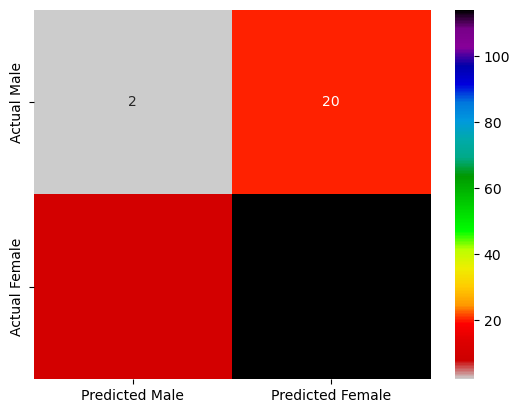

In [47]:
# let's use a heatmap to visualize the Confusion matrix for kNN
import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap="nipy_spectral_r")


In [48]:
# next let's train a RF model for this data!

from sklearn.ensemble import RandomForestClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=2)

# try chaging the number of trees "n_estimators" and see how this influences the testing accuracy

# train the classifier
rf_classifier.fit(X_train, y_train)

# make predictions on the test set
y_predicted = rf_classifier.predict(X_test)

In [49]:
expected = y_test
wrong = [(p,e) for (p,e) in zip(y_predicted, expected) if p!=e]

print(wrong)

# calculate accuracy
print("accuracy",f'{rf_classifier.score(X_test, y_test):.2%}')

[('male', 'female'), ('male', 'female'), ('male', 'female'), ('female', 'male'), ('male', 'female'), ('male', 'female'), ('female', 'male'), ('female', 'male'), ('male', 'female'), ('female', 'male'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('male', 'female'), ('female', 'male'), ('male', 'female'), ('male', 'female'), ('male', 'female')]
accuracy 82.88%


In [50]:
# confusion matrix for RF model
# it shows the correct and incorrect predicted values (hits and misses) for each of the classes

from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_rf = confusion_matrix(y_test, y_predicted)

# create a dataframe for the confusion matrix
confusion_df_rf = pd.DataFrame(confusion_rf, index= ['Actual Male', 'Actual Female'], columns=['Predicted Male', 'Predicted Female'])
confusion_df_rf

# each row is a true class
# each column is a predicted class

,Predicted Male,Predicted Female
Actual Male,2,20
Actual Female,5,119


In [60]:
#classification report for the RF model

from sklearn.metrics import classification_report

report = classification_report(y_test, y_predicted, target_names= ['Female','Male'])
print(report)

# shows the performance metrics for each class
# "supprt" is the number of testing samples in each class (true labels)


              precision    recall  f1-score   support

      Female       0.29      0.09      0.14        22
        Male       0.86      0.96      0.90       124

    accuracy                           0.83       146
   macro avg       0.57      0.53      0.52       146
weighted avg       0.77      0.83      0.79       146



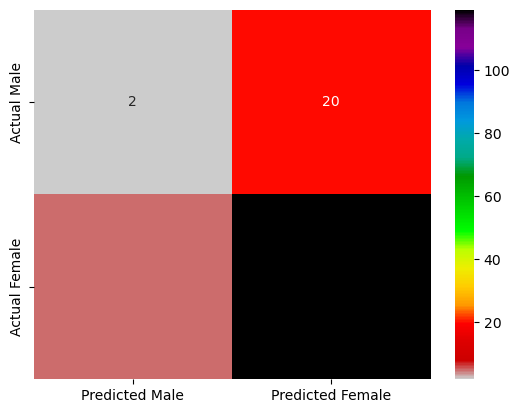

In [61]:
# let's use a heatmap to visualize the connfusion matrix for RF model
import seaborn as sns
axes = sns.heatmap(confusion_df_rf, annot=True, cmap="nipy_spectral_r")


In [62]:
# get feature importances
importances = rf_classifier.feature_importances_

# sort indices of feature importances in descending order
indices = np.argsort(importances)[::-1]

# print the feature ranking
print("Feature Ranking:")

for f in range(X_train.shape[1]):
    print("{}. Feature {} ({:.4f}): {}".format(f + 1, indices[f], 
                                               importances[indices[f]], columns_to_use[indices[f]]))

Feature Ranking:
1. Feature 15 (0.0846): buccolingual_LC
2. Feature 9 (0.0608): mesiodistal_LM2
3. Feature 10 (0.0593): buccolingual_UC
4. Feature 4 (0.0591): mesiodistal_UM2
5. Feature 14 (0.0551): buccolingual_UM2
6. Feature 3 (0.0542): mesiodistal_UM1
7. Feature 19 (0.0520): buccolingual_LM2
8. Feature 0 (0.0509): mesiodistal_UC
9. Feature 2 (0.0495): mesiodistal_UP2
10. Feature 7 (0.0473): mesiodistal_LP2
11. Feature 11 (0.0465): buccolingual_UP1
12. Feature 17 (0.0464): buccolingual_LP2
13. Feature 18 (0.0455): buccolingual_LM1
14. Feature 6 (0.0425): mesiodistal_LP1
15. Feature 1 (0.0424): mesiodistal_UP1
16. Feature 5 (0.0416): mesiodistal_LC
17. Feature 16 (0.0414): buccolingual_LP1
18. Feature 12 (0.0409): buccolingual_UP2
19. Feature 8 (0.0401): mesiodistal_LM1
20. Feature 13 (0.0398): buccolingual_UM1


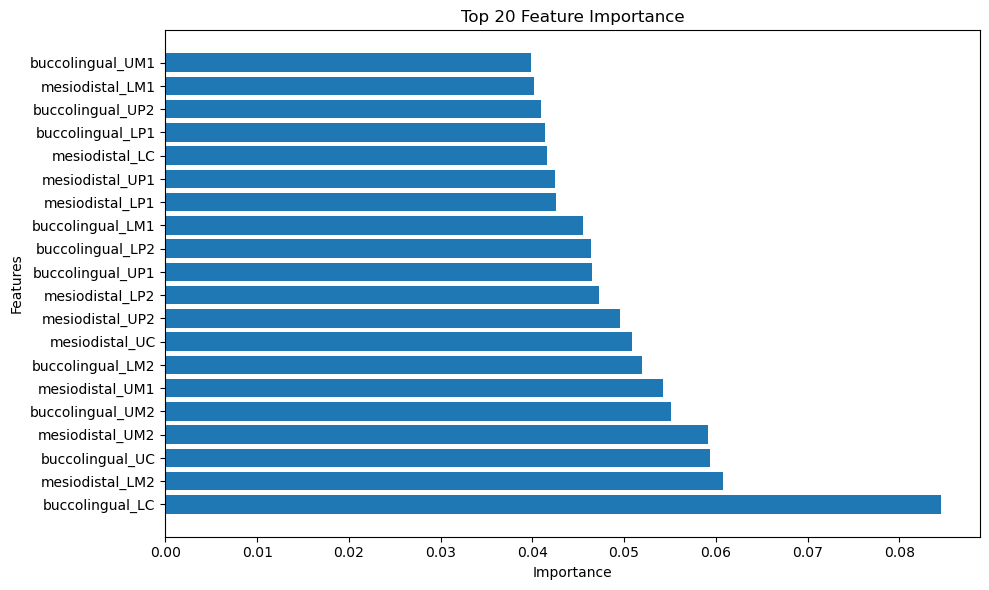

In [63]:
# sort indices of feature importances in descending order
indices = np.argsort(rf_classifier.feature_importances_)[::-1]

# plot the top x feature importances
top_features = 20
plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importance".format(top_features))
plt.barh(range(top_features), rf_classifier.feature_importances_[indices][:top_features], align="center")
plt.yticks(range(top_features), columns_to_use[indices][:top_features])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [64]:
# next let's use k-fold cross validation

from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=12, shuffle=True)

# n_splits specifies the number of folds
# random_state seeds the random number generator for reproducibility
# shuffle decides if the data will be randomized by shuffling it before splitting into folds
# helpful when samples in the original data are ordered

In [65]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(estimator=rf_classifier, X=X, y=y, cv=kfold)
# estimator specifies the estimator/classifier to use
# X and y specify the samples to use
# cv specifies the cv generator defined in the previous cell

scores

array([0.65306122, 0.7755102 , 0.83673469, 0.81632653, 0.70833333,
       0.79166667, 0.89583333, 0.8125    , 0.875     , 0.75      ])

In [66]:
print(f"CV accuracy mean: {scores.mean():.2%}")

print(f"CV accuracy std: {scores.std():.2%}")

CV accuracy mean: 79.15%
CV accuracy std: 7.00%


In [67]:
from sklearn.model_selection import KFold, GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create K-Fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=12)

# Create GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=kfold)

# Perform hyperparameter tuning
grid_search.fit(X, y)  # Assuming X contains your standardized features and y contains your target labels

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", best_params)
print("Best Score: {:.2f}%".format(best_score * 100))

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 80.80%


In [68]:
# run multiple estimators/models 

# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

from sklearn.svm import SVC  # support vector machine - support vector classifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# define the estimators/models we want to use as a dictionary
estimators = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVC": SVC(kernel='rbf', gamma="scale"),
    "GsussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(max_depth=None, min_samples_leaf=1, 
                                           min_samples_split=2, n_estimators=50, random_state=6),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=12)}

# now we can execute the models
# this loop iterates through items in the estimators dictionary and for each key-value pair
# unpacks the key into estimator_name and value into estimator_object

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X, y=y, cv=kfold)
    print(f"{estimator_name:>25}: " + f"mean accuracy={scores.mean():.2%}; " + f"std={scores.std():.2%}")

                      KNN: mean accuracy=76.24%; std=4.19%
                      SVC: mean accuracy=80.58%; std=3.21%
               GsussianNB: mean accuracy=63.84%; std=8.22%
             RandomForest: mean accuracy=80.78%; std=3.81%
                      MLP: mean accuracy=80.57%; std=3.04%
